In [1]:
#wt
#lipidomics_metabolomics_transcriptomics(kupffer cells)
#filtering


In [2]:
#import necessary libraries:
from mofapy2.run.entry_point import entry_point
import pandas as pd
import numpy as np
import requests

ent= entry_point()


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        


In [3]:
#load lipidomics data:
lipidomics = pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT_data/DataMatrix_wtLipidomics_2023_01_30.csv")
#print(lipidomics.shape)
print(lipidomics.shape)
lipidomics

(660, 29)


,Unnamed: 0,CD_CD_CD_103,CD_CD_CD_105,CD_CD_CD_106,CD_CD_HFD_200,CD_CD_HFD_201,CD_CD_HFD_203,CD_CD_HFD_205,CD_CD_HFD_206,CD_CD_HFD_207,...,HFD_HFD_CD_602,HFD_HFD_CD_603,HFD_HFD_CD_604,HFD_HFD_CD_605,HFD_HFD_CD_606,HFD_HFD_HFD_500,HFD_HFD_HFD_501,HFD_HFD_HFD_502,HFD_HFD_HFD_503,HFD_HFD_HFD_504
0,Car(14:2),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.022679,0.012631,0.000000,0.018628,0.000000,0.000000
1,Car(14:1),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.016026,0.000000,0.000000,0.000000,0.000000,0.000000
2,Car(14:0),0.035796,0.059788,0.102324,0.067638,0.034614,0.041253,0.053345,0.025642,0.062604,...,0.039922,0.034776,0.026156,0.035579,0.072976,0.038821,0.053324,0.044581,0.172271,0.061797
3,Car(16:2),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Car(16:1),0.034216,0.045847,0.047364,0.036504,0.050584,0.055673,0.027771,0.033463,0.054042,...,0.000000,0.038772,0.027969,0.038150,0.082187,0.029650,0.037699,0.062968,0.038900,0.041276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,TAG(61:8)_TAGODD,0.414630,0.576205,0.189522,0.639735,0.447826,1.437870,0.398621,0.430603,0.225338,...,0.502622,0.746531,1.530204,22.932997,1.846626,0.691624,2.360735,1.604558,0.116157,0.316657
656,TAG(61:7)_TAGODD,0.431361,0.480428,0.106920,0.450315,0.283981,1.736179,0.411845,0.428490,-0.000249,...,0.184296,0.051279,1.391812,15.206841,1.684688,0.612688,2.817626,2.750158,0.237528,0.137820
657,TAG(61:6)_TAGODD,0.000000,0.000000,0.000000,-0.000248,-0.000269,-0.000306,0.250061,-0.000221,0.000000,...,0.000000,0.000000,-0.000314,2.474071,-0.000295,0.119433,0.000000,0.000000,0.038956,0.028073
658,TAG(61:5)_TAGODD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051895,0.000000,...,0.000000,0.000000,0.000000,1.317206,0.134132,0.000000,0.000000,0.000000,0.057229,0.066653


In [4]:
#remove features with more than 50% missing values:
data = []
for i in lipidomics.columns:
     #print(lipidomics[i].eq(0).mean())
     if lipidomics[i].eq(0).mean() <= 0.3:
        data.append(lipidomics[i])
lipidomics_wt = pd.DataFrame(data)
print(lipidomics_wt.shape)
lipidomics_wt

(24, 660)


,0,1,2,3,4,5,6,7,8,9,...,650,651,652,653,654,655,656,657,658,659
Unnamed: 0,Car(14:2),Car(14:1),Car(14:0),Car(16:2),Car(16:1),Car(16:0),Car(18:2),Car(18:1),Car(18:0),Car(20:2),...,TAG(59:2)_TAGODD,TAG(59:1)_TAGODD,TAG(59:0)_TAGODD,TAG(61:10)_TAGODD,TAG(61:9)_TAGODD,TAG(61:8)_TAGODD,TAG(61:7)_TAGODD,TAG(61:6)_TAGODD,TAG(61:5)_TAGODD,TAG(61:4)_TAGODD
CD_CD_CD_103,0.0,0.0,0.035796,0.0,0.034216,0.101562,0.045423,0.107916,0.077571,0.0,...,0.162319,0.03282,0.0,0.195594,0.245285,0.41463,0.431361,0.0,0.0,0.0
CD_CD_CD_105,0.0,0.0,0.059788,0.0,0.045847,0.134982,0.042569,0.151249,0.109694,0.0,...,0.350367,0.138855,0.127094,0.178552,0.104911,0.576205,0.480428,0.0,0.0,0.0
CD_CD_CD_106,0.0,0.0,0.102324,0.0,0.047364,0.157014,0.080287,0.137623,0.133206,0.015809,...,0.0,0.046702,0.0,0.073797,0.051413,0.189522,0.10692,0.0,0.0,0.0
CD_CD_HFD_200,0.0,0.0,0.067638,0.0,0.036504,0.09636,0.050425,0.114681,0.131625,0.0,...,0.224697,-0.000248,0.0,0.0,0.397482,0.639735,0.450315,-0.000248,0.0,0.0
CD_CD_HFD_201,0.0,0.0,0.034614,0.0,0.050584,0.189367,0.066934,0.244214,0.119176,0.0,...,0.474345,0.139341,0.0,0.0,0.164217,0.447826,0.283981,-0.000269,0.0,0.0
CD_CD_HFD_205,0.0,0.0,0.053345,0.0,0.027771,0.177136,0.046442,0.131215,0.242675,0.0,...,0.543948,0.090513,0.0,0.0,0.231534,0.398621,0.411845,0.250061,0.0,0.0
CD_CD_HFD_206,0.0,0.0,0.025642,0.0,0.033463,0.173237,0.065752,0.17161,0.220315,0.0,...,0.103096,0.021195,0.03459,0.236292,0.206013,0.430603,0.42849,-0.000221,0.051895,0.0
CD_CD_HFD_207,0.0,0.0,0.062604,0.0,0.054042,0.249863,0.091638,0.063861,0.338595,0.0,...,0.168113,0.087839,0.0,0.0,0.117505,0.225338,-0.000249,0.0,0.0,0.0
HFD_CD_CD_800,0.0,0.0,0.042316,0.0,0.053673,0.224876,0.041312,0.256484,0.201164,0.0,...,0.151502,0.105535,0.0,0.0,0.784354,1.86628,1.669939,-0.000279,0.0,0.0


In [5]:
lipidomics_wt.head()
lipidomics= lipidomics_wt.T
lipidomics.head()
lipidomics.shape

(660, 24)

In [6]:
data = []
for i in range(len(lipidomics)):
     #print(lipidomics.iloc[i].eq(0).mean())
     if lipidomics.iloc[i, 1:].eq(0).mean() <= 0.3:
        data.append(lipidomics.iloc[i])
lipidomics_remove_rows = pd.DataFrame(data)
lipidomics_remove_rows
lipidomics_remove_rows

,Unnamed: 0,CD_CD_CD_103,CD_CD_CD_105,CD_CD_CD_106,CD_CD_HFD_200,CD_CD_HFD_201,CD_CD_HFD_205,CD_CD_HFD_206,CD_CD_HFD_207,HFD_CD_CD_800,...,HFD_CD_HFD_703,HFD_HFD_CD_601,HFD_HFD_CD_603,HFD_HFD_CD_604,HFD_HFD_CD_605,HFD_HFD_CD_606,HFD_HFD_HFD_500,HFD_HFD_HFD_501,HFD_HFD_HFD_503,HFD_HFD_HFD_504
2,Car(14:0),0.035796,0.059788,0.102324,0.067638,0.034614,0.053345,0.025642,0.062604,0.042316,...,0.024352,0.050808,0.034776,0.026156,0.035579,0.072976,0.038821,0.053324,0.172271,0.061797
4,Car(16:1),0.034216,0.045847,0.047364,0.036504,0.050584,0.027771,0.033463,0.054042,0.053673,...,0.032226,0.047815,0.038772,0.027969,0.038150,0.082187,0.029650,0.037699,0.038900,0.041276
5,Car(16:0),0.101562,0.134982,0.157014,0.096360,0.189367,0.177136,0.173237,0.249863,0.224876,...,0.144345,0.296427,0.151589,0.128743,0.169041,0.312758,0.173216,0.206656,0.208344,0.229369
6,Car(18:2),0.045423,0.042569,0.080287,0.050425,0.066934,0.046442,0.065752,0.091638,0.041312,...,0.042143,0.053998,0.045318,0.022009,0.034643,0.089726,0.051369,0.064699,0.050062,0.069832
7,Car(18:1),0.107916,0.151249,0.137623,0.114681,0.244214,0.131215,0.171610,0.063861,0.256484,...,0.140085,0.327171,0.264518,0.111655,0.079305,0.279146,0.188603,0.200502,0.184250,0.228647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,TAG(59:3)_TAGODD,0.074169,0.197051,0.063417,0.146121,0.375943,0.313717,0.204373,0.140151,0.518644,...,0.176050,0.777572,0.332164,0.835389,4.845042,0.397235,0.859992,0.291849,0.123324,0.402113
650,TAG(59:2)_TAGODD,0.162319,0.350367,0.000000,0.224697,0.474345,0.543948,0.103096,0.168113,0.151502,...,0.282322,0.166932,0.000000,0.158944,1.081367,0.290992,0.784703,0.933941,0.421710,0.291262
654,TAG(61:9)_TAGODD,0.245285,0.104911,0.051413,0.397482,0.164217,0.231534,0.206013,0.117505,0.784354,...,0.132957,0.000000,0.000000,0.655594,18.724244,3.054841,0.774482,1.387182,0.000000,0.229220
655,TAG(61:8)_TAGODD,0.414630,0.576205,0.189522,0.639735,0.447826,0.398621,0.430603,0.225338,1.866280,...,0.228778,2.170027,0.746531,1.530204,22.932997,1.846626,0.691624,2.360735,0.116157,0.316657


In [7]:
#lipodomics data:
data_list = []

for i in range(len(lipidomics_remove_rows)):
    row = lipidomics_remove_rows.iloc[i, 1:].T.reset_index()
    row.columns = ['sample', 'value']  
    #print(row)
   
    feature = lipidomics_remove_rows.iloc[i, 0] 
    #print(feature)
    
    
    row['feature'] = feature
    
    
    lipid_class = feature.split("(")[0]
    #print(lipid_class)

    row['view'] = "Lipidomics"

    
    
    row['group'] = "group_lipidomics_wt"
    data_list.append(row)

df1_lipidomics = pd.concat(data_list, ignore_index=True)

df1_lipidomics


,sample,value,feature,view,group
0,CD_CD_CD_103,0.035796,Car(14:0),Lipidomics,group_lipidomics_wt
1,CD_CD_CD_105,0.059788,Car(14:0),Lipidomics,group_lipidomics_wt
2,CD_CD_CD_106,0.102324,Car(14:0),Lipidomics,group_lipidomics_wt
3,CD_CD_HFD_200,0.067638,Car(14:0),Lipidomics,group_lipidomics_wt
4,CD_CD_HFD_201,0.034614,Car(14:0),Lipidomics,group_lipidomics_wt
...,...,...,...,...,...
10138,HFD_HFD_CD_606,1.684688,TAG(61:7)_TAGODD,Lipidomics,group_lipidomics_wt
10139,HFD_HFD_HFD_500,0.612688,TAG(61:7)_TAGODD,Lipidomics,group_lipidomics_wt
10140,HFD_HFD_HFD_501,2.817626,TAG(61:7)_TAGODD,Lipidomics,group_lipidomics_wt
10141,HFD_HFD_HFD_503,0.237528,TAG(61:7)_TAGODD,Lipidomics,group_lipidomics_wt


In [8]:
#remove missing values:
final_lipodomics= df1_lipidomics[df1_lipidomics["value"] != 0]
final_lipodomics.head()
final_lipodomics.shape

(9904, 5)

In [9]:
#Normalization of lipidomics data:
#log2:
final_lipodomics["value"] = final_lipodomics["value"].apply(lambda x: np.log2(x + 1))
final_lipodomics

,sample,value,feature,view,group
0,CD_CD_CD_103,0.050740,Car(14:0),Lipidomics,group_lipidomics_wt
1,CD_CD_CD_105,0.083776,Car(14:0),Lipidomics,group_lipidomics_wt
2,CD_CD_CD_106,0.140549,Car(14:0),Lipidomics,group_lipidomics_wt
3,CD_CD_HFD_200,0.094423,Car(14:0),Lipidomics,group_lipidomics_wt
4,CD_CD_HFD_201,0.049092,Car(14:0),Lipidomics,group_lipidomics_wt
...,...,...,...,...,...
10138,HFD_HFD_CD_606,1.424755,TAG(61:7)_TAGODD,Lipidomics,group_lipidomics_wt
10139,HFD_HFD_HFD_500,0.689467,TAG(61:7)_TAGODD,Lipidomics,group_lipidomics_wt
10140,HFD_HFD_HFD_501,1.932676,TAG(61:7)_TAGODD,Lipidomics,group_lipidomics_wt
10141,HFD_HFD_HFD_503,0.307461,TAG(61:7)_TAGODD,Lipidomics,group_lipidomics_wt


In [10]:
#sort values ascending:
final_lipodomics = final_lipodomics.sort_values(by = "value", ascending = False)
final_lipodomics.head()

,sample,value,feature,view,group
7679,HFD_HFD_HFD_501,13.894826,TAG(52:3)_TAG,Lipidomics,group_lipidomics_wt
7702,HFD_HFD_HFD_501,13.865746,TAG(52:2)_TAG,Lipidomics,group_lipidomics_wt
7698,HFD_HFD_CD_604,13.540706,TAG(52:2)_TAG,Lipidomics,group_lipidomics_wt
7692,HFD_CD_CD_803,13.432930,TAG(52:2)_TAG,Lipidomics,group_lipidomics_wt
7697,HFD_HFD_CD_603,13.176331,TAG(52:2)_TAG,Lipidomics,group_lipidomics_wt


In [11]:
final_lipodomics.describe()

,value
count,9904.000000
mean,3.073549
std,2.796718
min,-0.000885
25%,0.825056
50%,2.141416
75%,4.668013
max,13.894826


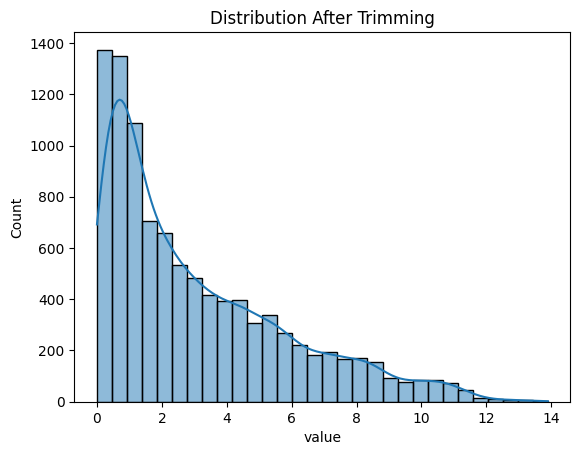

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_lipodomics["value"], kde=True, bins=30)
plt.title("Distribution After Trimming")
plt.show()


In [13]:
#remove values less than 0.8:
final_lipodomics = final_lipodomics[final_lipodomics["value"] >= 0.6]
final_lipodomics


,sample,value,feature,view,group
7679,HFD_HFD_HFD_501,13.894826,TAG(52:3)_TAG,Lipidomics,group_lipidomics_wt
7702,HFD_HFD_HFD_501,13.865746,TAG(52:2)_TAG,Lipidomics,group_lipidomics_wt
7698,HFD_HFD_CD_604,13.540706,TAG(52:2)_TAG,Lipidomics,group_lipidomics_wt
7692,HFD_CD_CD_803,13.432930,TAG(52:2)_TAG,Lipidomics,group_lipidomics_wt
7697,HFD_HFD_CD_603,13.176331,TAG(52:2)_TAG,Lipidomics,group_lipidomics_wt
...,...,...,...,...,...
1762,HFD_HFD_CD_601,0.602436,DAG(40:1),Lipidomics,group_lipidomics_wt
8604,CD_CD_CD_106,0.601996,TAG(60:4)_TAG,Lipidomics,group_lipidomics_wt
8850,HFD_HFD_CD_606,0.601000,TAG(37:0)_TAGODD,Lipidomics,group_lipidomics_wt
3139,HFD_CD_HFD_701,0.600876,LPE(20:3),Lipidomics,group_lipidomics_wt


In [14]:
#remove values greater than 4:
final_lipodomics = final_lipodomics[final_lipodomics["value"] <= 4.6]
final_lipodomics

,sample,value,feature,view,group
1417,HFD_HFD_CD_601,4.598996,DAG(36:1),Lipidomics,group_lipidomics_wt
6557,CD_CD_CD_106,4.597894,PS(40:4),Lipidomics,group_lipidomics_wt
6499,HFD_CD_HFD_703,4.597724,PS(40:7),Lipidomics,group_lipidomics_wt
8213,CD_CD_CD_106,4.597488,TAG(58:8)_TAG,Lipidomics,group_lipidomics_wt
8189,CD_CD_CD_105,4.596501,TAG(58:9)_TAG,Lipidomics,group_lipidomics_wt
...,...,...,...,...,...
1762,HFD_HFD_CD_601,0.602436,DAG(40:1),Lipidomics,group_lipidomics_wt
8604,CD_CD_CD_106,0.601996,TAG(60:4)_TAG,Lipidomics,group_lipidomics_wt
8850,HFD_HFD_CD_606,0.601000,TAG(37:0)_TAGODD,Lipidomics,group_lipidomics_wt
3139,HFD_CD_HFD_701,0.600876,LPE(20:3),Lipidomics,group_lipidomics_wt


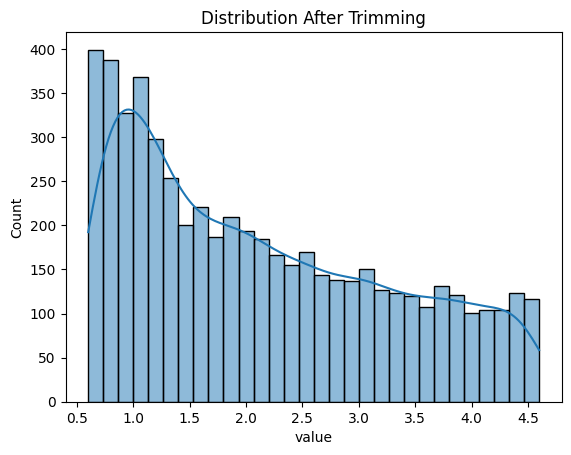

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_lipodomics["value"], kde=True, bins=30)
plt.title("Distribution After Trimming")
plt.show()


In [16]:
final_lipodomics[:100]

,sample,value,feature,view,group
1417,HFD_HFD_CD_601,4.598996,DAG(36:1),Lipidomics,group_lipidomics_wt
6557,CD_CD_CD_106,4.597894,PS(40:4),Lipidomics,group_lipidomics_wt
6499,HFD_CD_HFD_703,4.597724,PS(40:7),Lipidomics,group_lipidomics_wt
8213,CD_CD_CD_106,4.597488,TAG(58:8)_TAG,Lipidomics,group_lipidomics_wt
8189,CD_CD_CD_105,4.596501,TAG(58:9)_TAG,Lipidomics,group_lipidomics_wt
...,...,...,...,...,...
6095,CD_CD_CD_103,4.485435,PG(36:2),Lipidomics,group_lipidomics_wt
9685,CD_CD_CD_106,4.485118,TAG(53:2)_TAGODD,Lipidomics,group_lipidomics_wt
7484,HFD_CD_CD_802,4.484665,TAG(50:5)_TAG,Lipidomics,group_lipidomics_wt
6808,CD_CD_CD_103,4.481953,SM(22:1),Lipidomics,group_lipidomics_wt


In [17]:
final_lipodomics.describe()

,value
count,5566.000000
mean,2.128202
std,1.156697
min,0.600684
25%,1.104611
50%,1.893533
75%,3.028452
max,4.598996


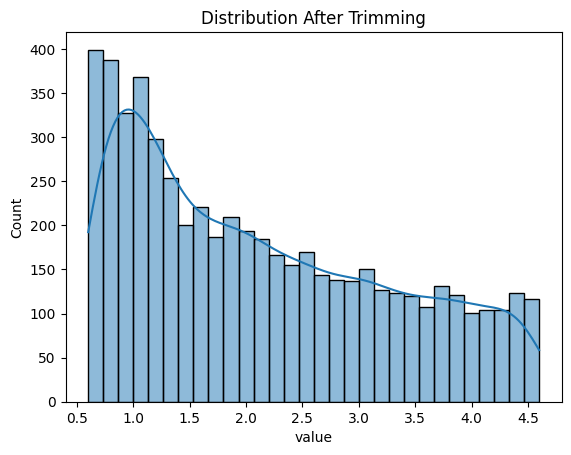

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_lipodomics["value"], kde=True, bins=30)
plt.title("Distribution After Trimming")
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [19]:
#%pip install openpyxl

metabolomics = pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT_data/batch_norm_imput_data.csv",  sep = ";", on_bad_lines='skip')
#print(metabolomics)

metabolomics.head()

,PARENT_SAMPLE_NAME,30,35,49,50,55,62,71,92,93,...,100022004,100022005,100022006,100022007,100022008,100022009,100022014,100022017,100022041,100022120
0,UHBO-00909,"1,263196724","2,781068393","1,067288109","2,3889985","0,492861356","0,985890183","1,348984509","1,557138045","1,201718137",...,"1,795209217","6,145397418","6,972877995","2,692085735","6,94147986","4,284333484","5,217145312","2,515704587","1,175637572","1,121925273"
1,UHBO-00910,"0,96967371","1,482323505","0,941553736","1,14978295","1,422265125","1,155380774","1,303805111","1,506549568","1,087771034",...,"1,166187671","0,604053744","0,83499901","0,825704352",1,"1,233749778","0,859976006","2,011541654","1,214253515","1,597948924"
2,UHBO-00911,"0,989362284","1,000188589","0,292503035","1,191345398","2,279249698","0,916144988","1,001006223","1,664515921","0,354855299",...,"0,307111688","0,135016295","0,165083475","0,129196883","0,089722382","0,050782213","0,422308456","0,213165489","0,863098939","0,51736125"
3,UHBO-00912,"0,953683827","0,979320902","1,531404218","0,94494098","0,493600748","2,605577702","1,616009533","0,973612339","0,821290218",...,"1,027864507","1,025776244","0,960633818","1,010039486","1,008100449","0,95271482","0,923871025","0,746680593","0,666303058","0,947929006"
4,UHBO-00913,"1,264298377","0,961779964","0,632321694","0,716800317","2,490499506","1,302452832","1,007101814","0,807077716","0,81342081",...,"0,678208081","1,018658367","1,160276747","1,04779961","0,688923703","0,661483376","0,620036435","0,074285243","0,933440258","1,044097362"


In [20]:
#replace nan to 0:
metabolomics = metabolomics.fillna(0)
metabolomics.head()



,PARENT_SAMPLE_NAME,30,35,49,50,55,62,71,92,93,...,100022004,100022005,100022006,100022007,100022008,100022009,100022014,100022017,100022041,100022120
0,UHBO-00909,"1,263196724","2,781068393","1,067288109","2,3889985","0,492861356","0,985890183","1,348984509","1,557138045","1,201718137",...,"1,795209217","6,145397418","6,972877995","2,692085735","6,94147986","4,284333484","5,217145312","2,515704587","1,175637572","1,121925273"
1,UHBO-00910,"0,96967371","1,482323505","0,941553736","1,14978295","1,422265125","1,155380774","1,303805111","1,506549568","1,087771034",...,"1,166187671","0,604053744","0,83499901","0,825704352",1,"1,233749778","0,859976006","2,011541654","1,214253515","1,597948924"
2,UHBO-00911,"0,989362284","1,000188589","0,292503035","1,191345398","2,279249698","0,916144988","1,001006223","1,664515921","0,354855299",...,"0,307111688","0,135016295","0,165083475","0,129196883","0,089722382","0,050782213","0,422308456","0,213165489","0,863098939","0,51736125"
3,UHBO-00912,"0,953683827","0,979320902","1,531404218","0,94494098","0,493600748","2,605577702","1,616009533","0,973612339","0,821290218",...,"1,027864507","1,025776244","0,960633818","1,010039486","1,008100449","0,95271482","0,923871025","0,746680593","0,666303058","0,947929006"
4,UHBO-00913,"1,264298377","0,961779964","0,632321694","0,716800317","2,490499506","1,302452832","1,007101814","0,807077716","0,81342081",...,"0,678208081","1,018658367","1,160276747","1,04779961","0,688923703","0,661483376","0,620036435","0,074285243","0,933440258","1,044097362"


In [21]:
#change the , to . in the values:
metabolomics = metabolomics.replace(',', '.', regex=True)
metabolomics.head()

,PARENT_SAMPLE_NAME,30,35,49,50,55,62,71,92,93,...,100022004,100022005,100022006,100022007,100022008,100022009,100022014,100022017,100022041,100022120
0,UHBO-00909,1.263196724,2.781068393,1.067288109,2.3889985,0.492861356,0.985890183,1.348984509,1.557138045,1.201718137,...,1.795209217,6.145397418,6.972877995,2.692085735,6.94147986,4.284333484,5.217145312,2.515704587,1.175637572,1.121925273
1,UHBO-00910,0.96967371,1.482323505,0.941553736,1.14978295,1.422265125,1.155380774,1.303805111,1.506549568,1.087771034,...,1.166187671,0.604053744,0.83499901,0.825704352,1,1.233749778,0.859976006,2.011541654,1.214253515,1.597948924
2,UHBO-00911,0.989362284,1.000188589,0.292503035,1.191345398,2.279249698,0.916144988,1.001006223,1.664515921,0.354855299,...,0.307111688,0.135016295,0.165083475,0.129196883,0.089722382,0.050782213,0.422308456,0.213165489,0.863098939,0.51736125
3,UHBO-00912,0.953683827,0.979320902,1.531404218,0.94494098,0.493600748,2.605577702,1.616009533,0.973612339,0.821290218,...,1.027864507,1.025776244,0.960633818,1.010039486,1.008100449,0.95271482,0.923871025,0.746680593,0.666303058,0.947929006
4,UHBO-00913,1.264298377,0.961779964,0.632321694,0.716800317,2.490499506,1.302452832,1.007101814,0.807077716,0.81342081,...,0.678208081,1.018658367,1.160276747,1.04779961,0.688923703,0.661483376,0.620036435,0.074285243,0.933440258,1.044097362


In [22]:
df =metabolomics.set_index('PARENT_SAMPLE_NAME').iloc[:,]
df.head()

,30,35,49,50,55,62,71,92,93,98,...,100022004,100022005,100022006,100022007,100022008,100022009,100022014,100022017,100022041,100022120
PARENT_SAMPLE_NAME,,,,,,,,,,,,,,,,,,,,,
UHBO-00909,1.263196724,2.781068393,1.067288109,2.3889985,0.492861356,0.985890183,1.348984509,1.557138045,1.201718137,1.050835059,...,1.795209217,6.145397418,6.972877995,2.692085735,6.94147986,4.284333484,5.217145312,2.515704587,1.175637572,1.121925273
UHBO-00910,0.96967371,1.482323505,0.941553736,1.14978295,1.422265125,1.155380774,1.303805111,1.506549568,1.087771034,0.886933041,...,1.166187671,0.604053744,0.83499901,0.825704352,1,1.233749778,0.859976006,2.011541654,1.214253515,1.597948924
UHBO-00911,0.989362284,1.000188589,0.292503035,1.191345398,2.279249698,0.916144988,1.001006223,1.664515921,0.354855299,0.671903841,...,0.307111688,0.135016295,0.165083475,0.129196883,0.089722382,0.050782213,0.422308456,0.213165489,0.863098939,0.51736125
UHBO-00912,0.953683827,0.979320902,1.531404218,0.94494098,0.493600748,2.605577702,1.616009533,0.973612339,0.821290218,1.369660158,...,1.027864507,1.025776244,0.960633818,1.010039486,1.008100449,0.95271482,0.923871025,0.746680593,0.666303058,0.947929006
UHBO-00913,1.264298377,0.961779964,0.632321694,0.716800317,2.490499506,1.302452832,1.007101814,0.807077716,0.81342081,0.73658925,...,0.678208081,1.018658367,1.160276747,1.04779961,0.688923703,0.661483376,0.620036435,0.074285243,0.933440258,1.044097362


In [23]:
metabolomics_wt = df.T
print(metabolomics_wt)
metabolomics_wt.head()


PARENT_SAMPLE_NAME   UHBO-00909   UHBO-00910   UHBO-00911   UHBO-00912  \
30                  1.263196724   0.96967371  0.989362284  0.953683827   
35                  2.781068393  1.482323505  1.000188589  0.979320902   
49                  1.067288109  0.941553736  0.292503035  1.531404218   
50                    2.3889985   1.14978295  1.191345398   0.94494098   
55                  0.492861356  1.422265125  2.279249698  0.493600748   
...                         ...          ...          ...          ...   
100022009           4.284333484  1.233749778  0.050782213   0.95271482   
100022014           5.217145312  0.859976006  0.422308456  0.923871025   
100022017           2.515704587  2.011541654  0.213165489  0.746680593   
100022041           1.175637572  1.214253515  0.863098939  0.666303058   
100022120           1.121925273  1.597948924   0.51736125  0.947929006   

PARENT_SAMPLE_NAME   UHBO-00913   UHBO-00914   UHBO-00915   UHBO-00916  \
30                  1.264298377  1.52

PARENT_SAMPLE_NAME,UHBO-00909,UHBO-00910,UHBO-00911,UHBO-00912,UHBO-00913,UHBO-00914,UHBO-00915,UHBO-00916,UHBO-00917,UHBO-00918,...,UHBO-00941,UHBO-00942,UHBO-00943,UHBO-00944,UHBO-00945,UHBO-00946,UHBO-00947,UHBO-00948,UHBO-00949,UHBO-00950
30,1.263196724,0.96967371,0.989362284,0.953683827,1.264298377,1.521892378,1.107626961,0.784484584,1.045403431,0.408184449,...,0.966484085,0.704706188,0.637274661,0.860709453,1.010637716,0.622501767,1.202931909,1.932290077,1.042036826,1.25592263
35,2.781068393,1.482323505,1.000188589,0.979320902,0.961779964,1.003336837,0.613250578,0.893691003,1.343643794,0.596898028,...,1.682639491,0.785908748,1.329928437,0.755856123,2.945765775,1.548351739,0.987884442,1.942390731,0.677657312,0.942800003
49,1.067288109,0.941553736,0.292503035,1.531404218,0.632321694,1.063231925,0.801379152,0.292503035,1.61873825,0.292503035,...,0.820281901,1.267627389,0.292503035,0.292503035,1.389261515,0.977672627,0.292503035,2.407070049,1.211839554,0.520981024
50,2.3889985,1.14978295,1.191345398,0.94494098,0.716800317,0.883065586,0.63364688,0.810086522,1.703532561,0.344042983,...,3.131046567,0.771989225,1.270241774,0.624331176,2.234531575,15.85042095,1.089505888,1.407289586,0.668261613,0.665867984
55,0.492861356,1.422265125,2.279249698,0.493600748,2.490499506,0.315515448,0.587939862,2.457000697,0.737830399,0.975833516,...,1.240138319,2.149398864,1.909033374,1.274364599,0.52261615,0.244998636,1.208780411,0.192843647,2.355077562,0.951534494


In [24]:
#metadata for metabolomics:
#metadata = pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT_data/metabolomics_metadata.csv", sep=";")
#metadata.head()

In [25]:
#print(metadata.columns)
#print(metabolomics_wt.columns)


In [26]:
# Replace PARENT_SAMPLE_NAME in metabolomics_wt with CHEMICAL_NAME from metadata
#metabolomics_wt = metabolomics_wt.T
#metabolomics_wt.columns = metadata["CHEMICAL_NAME"]
#metabolomics_wt = metabolomics_wt.T
#metabolomics_wt.head()




In [27]:
#metabolomics= metabolomics_wt.T
#metabolomics.head()

In [28]:
#rows is samples 
#columns is features
#metabolomics = metabolomics.T
#metabolomics


In [29]:
#df =metabolomics.set_index('PARENT_SAMPLE_NAME').iloc[:,]
#df.head()

In [30]:
data_list = []
 
for i in range(len(metabolomics_wt)):
    row = metabolomics_wt.iloc[i,].T.reset_index()
    row.columns = ['sample', 'value']  
    

    feature = str(metabolomics_wt.index[i])
    #print(feature)
    
    
    row['feature'] = feature
    
    
    transcriptomics_class= feature.split("0")[0] 
    

    row['view'] = "metabolomics"

    
    
    row['group'] = "group_metabolomics_wt"
    data_list.append(row)

df1_metabolomics = pd.concat(data_list, ignore_index=True)
df1_metabolomics


,sample,value,feature,view,group
0,UHBO-00909,1.263196724,30,metabolomics,group_metabolomics_wt
1,UHBO-00910,0.96967371,30,metabolomics,group_metabolomics_wt
2,UHBO-00911,0.989362284,30,metabolomics,group_metabolomics_wt
3,UHBO-00912,0.953683827,30,metabolomics,group_metabolomics_wt
4,UHBO-00913,1.264298377,30,metabolomics,group_metabolomics_wt
...,...,...,...,...,...
38257,UHBO-00946,2.944285078,100022120,metabolomics,group_metabolomics_wt
38258,UHBO-00947,1.663053287,100022120,metabolomics,group_metabolomics_wt
38259,UHBO-00948,0.768488197,100022120,metabolomics,group_metabolomics_wt
38260,UHBO-00949,0.803384094,100022120,metabolomics,group_metabolomics_wt


In [31]:
# Ensure the 'sample' column is of string type before concatenation
df1_metabolomics["feature"] = "chem_id_" + df1_metabolomics["feature"].astype(str)
df1_metabolomics


,sample,value,feature,view,group
0,UHBO-00909,1.263196724,chem_id_30,metabolomics,group_metabolomics_wt
1,UHBO-00910,0.96967371,chem_id_30,metabolomics,group_metabolomics_wt
2,UHBO-00911,0.989362284,chem_id_30,metabolomics,group_metabolomics_wt
3,UHBO-00912,0.953683827,chem_id_30,metabolomics,group_metabolomics_wt
4,UHBO-00913,1.264298377,chem_id_30,metabolomics,group_metabolomics_wt
...,...,...,...,...,...
38257,UHBO-00946,2.944285078,chem_id_100022120,metabolomics,group_metabolomics_wt
38258,UHBO-00947,1.663053287,chem_id_100022120,metabolomics,group_metabolomics_wt
38259,UHBO-00948,0.768488197,chem_id_100022120,metabolomics,group_metabolomics_wt
38260,UHBO-00949,0.803384094,chem_id_100022120,metabolomics,group_metabolomics_wt


In [32]:
#remove missing values:
final_metabolomics= df1_metabolomics[df1_metabolomics["value"] != 0]
final_metabolomics


,sample,value,feature,view,group
0,UHBO-00909,1.263196724,chem_id_30,metabolomics,group_metabolomics_wt
1,UHBO-00910,0.96967371,chem_id_30,metabolomics,group_metabolomics_wt
2,UHBO-00911,0.989362284,chem_id_30,metabolomics,group_metabolomics_wt
3,UHBO-00912,0.953683827,chem_id_30,metabolomics,group_metabolomics_wt
4,UHBO-00913,1.264298377,chem_id_30,metabolomics,group_metabolomics_wt
...,...,...,...,...,...
38257,UHBO-00946,2.944285078,chem_id_100022120,metabolomics,group_metabolomics_wt
38258,UHBO-00947,1.663053287,chem_id_100022120,metabolomics,group_metabolomics_wt
38259,UHBO-00948,0.768488197,chem_id_100022120,metabolomics,group_metabolomics_wt
38260,UHBO-00949,0.803384094,chem_id_100022120,metabolomics,group_metabolomics_wt


In [33]:

# Verify the changes
# Convert 'value' column to float
final_metabolomics['value'] = final_metabolomics['value'].astype(float)

# Verify the changes
print(final_metabolomics.dtypes)

sample      object
value      float64
feature     object
view        object
group       object
dtype: object


In [34]:
final_metabolomics

,sample,value,feature,view,group
0,UHBO-00909,1.263197,chem_id_30,metabolomics,group_metabolomics_wt
1,UHBO-00910,0.969674,chem_id_30,metabolomics,group_metabolomics_wt
2,UHBO-00911,0.989362,chem_id_30,metabolomics,group_metabolomics_wt
3,UHBO-00912,0.953684,chem_id_30,metabolomics,group_metabolomics_wt
4,UHBO-00913,1.264298,chem_id_30,metabolomics,group_metabolomics_wt
...,...,...,...,...,...
38257,UHBO-00946,2.944285,chem_id_100022120,metabolomics,group_metabolomics_wt
38258,UHBO-00947,1.663053,chem_id_100022120,metabolomics,group_metabolomics_wt
38259,UHBO-00948,0.768488,chem_id_100022120,metabolomics,group_metabolomics_wt
38260,UHBO-00949,0.803384,chem_id_100022120,metabolomics,group_metabolomics_wt


In [35]:
final_metabolomics.describe()


,value
count,38262.000000
mean,1.356925
std,9.777829
min,0.000805
25%,0.669237
50%,0.976514
75%,1.273246
max,969.771986


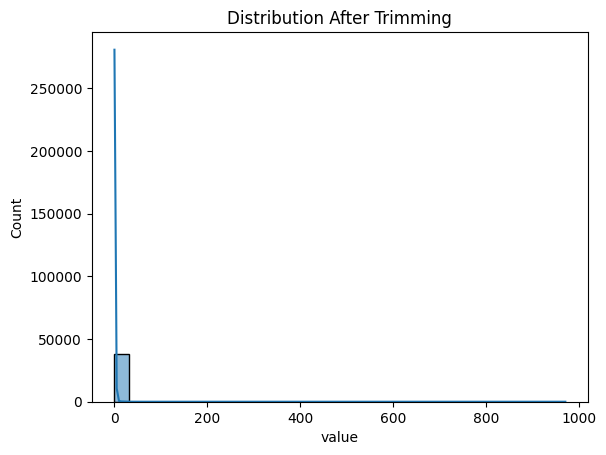

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_metabolomics["value"], kde=True, bins=30)
plt.title("Distribution After Trimming")
plt.show()


In [37]:
#remove values less than 0.7:
final_metabolomics = final_metabolomics[final_metabolomics["value"] >= 0.7]
final_metabolomics

#remove values greater than 1.3:
final_metabolomics = final_metabolomics[final_metabolomics["value"] <= 1.3]
final_metabolomics


,sample,value,feature,view,group
0,UHBO-00909,1.263197,chem_id_30,metabolomics,group_metabolomics_wt
1,UHBO-00910,0.969674,chem_id_30,metabolomics,group_metabolomics_wt
2,UHBO-00911,0.989362,chem_id_30,metabolomics,group_metabolomics_wt
3,UHBO-00912,0.953684,chem_id_30,metabolomics,group_metabolomics_wt
4,UHBO-00913,1.264298,chem_id_30,metabolomics,group_metabolomics_wt
...,...,...,...,...,...
38250,UHBO-00939,1.135070,chem_id_100022120,metabolomics,group_metabolomics_wt
38251,UHBO-00940,0.966758,chem_id_100022120,metabolomics,group_metabolomics_wt
38256,UHBO-00945,1.128938,chem_id_100022120,metabolomics,group_metabolomics_wt
38259,UHBO-00948,0.768488,chem_id_100022120,metabolomics,group_metabolomics_wt


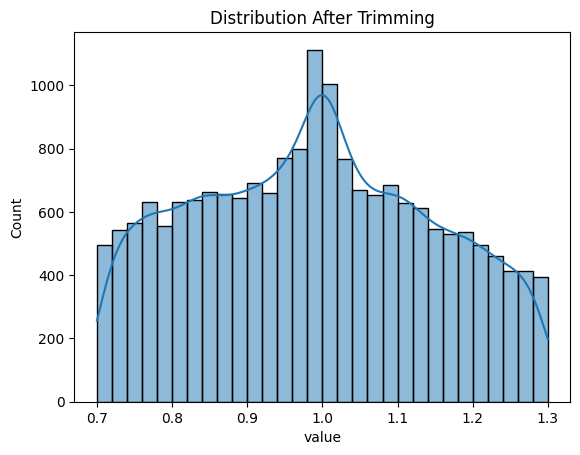

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_metabolomics["value"], kde=True, bins=30)
plt.title("Distribution After Trimming")
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [39]:
#transcriptomics 

In [40]:
#load transcriptomics HC data by identifier
transcriptomics_kc=pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT_data/CountMatrix_KupfferCells_WT_RNASeq_kallistoImport (1).csv")
transcriptomics_kc

,Unnamed: 0,5819,5820,5821,5822,5823,5824,5825,5826,5827,...,5953,5954,5979,5980,5981,5982,6024,6025,6026,6027
0,ENSMUSG00000000001.4,103,223,38,150,130,233,164,265,354,...,142,904,607,1221,2636,1029,1005,655,1642,1125
1,ENSMUSG00000000003.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSMUSG00000000028.14,13,0,0,24,0,0,0,21,47,...,0,62,3,37,214,54,89,114,29,200
3,ENSMUSG00000000031.16,0,0,0,0,0,0,0,0,0,...,0,0,1,61,0,0,0,0,0,0
4,ENSMUSG00000000037.16,0,0,2,0,0,3,0,0,0,...,0,2,0,2,2,0,0,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53459,ENSMUSG00000115846.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53460,ENSMUSG00000115847.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53461,ENSMUSG00000115848.1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
53462,ENSMUSG00000115849.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
gene_kc= pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT&KO_data/RowAnno_KupfferCells_RNAseq.csv")
print(gene_kc.columns)  # Print the column names to identify the correct column name
gene_kc.head()

Index(['Unnamed: 0', 'GENEID', 'SYMBOL', 'GENETYPE'], dtype='object')


,Unnamed: 0,GENEID,SYMBOL,GENETYPE
0,ENSMUSG00000000001.4,ENSMUSG00000000001.4,Gnai3,protein_coding
1,ENSMUSG00000000003.15,ENSMUSG00000000003.15,Pbsn,protein_coding
2,ENSMUSG00000000028.14,ENSMUSG00000000028.14,Cdc45,protein_coding
3,ENSMUSG00000000031.16,ENSMUSG00000000031.16,H19,lincRNA
4,ENSMUSG00000000037.16,ENSMUSG00000000037.16,Scml2,protein_coding


In [42]:
#merge symbol to the unamed column
transcriptomics_kc['Unnamed: 0'] =  gene_kc['SYMBOL'] 
transcriptomics_kc.head()

,Unnamed: 0,5819,5820,5821,5822,5823,5824,5825,5826,5827,...,5953,5954,5979,5980,5981,5982,6024,6025,6026,6027
0,Gnai3,103,223,38,150,130,233,164,265,354,...,142,904,607,1221,2636,1029,1005,655,1642,1125
1,Pbsn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cdc45,13,0,0,24,0,0,0,21,47,...,0,62,3,37,214,54,89,114,29,200
3,H19,0,0,0,0,0,0,0,0,0,...,0,0,1,61,0,0,0,0,0,0
4,Scml2,0,0,2,0,0,3,0,0,0,...,0,2,0,2,2,0,0,0,0,13


In [43]:
trans_kc_lenghts = pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT&KO_data/Indentifires_kc - Copy.csv")
trans_kc_lenghts.head()

,Unnamed: 0.1,Unnamed: 0,gene_length
0,0,ENSMUSG00000000001,38866.0
1,1,ENSMUSG00000000003,15722.0
2,2,ENSMUSG00000000028,31540.0
3,3,ENSMUSG00000000031,4695.0
4,4,ENSMUSG00000000037,175688.0


In [44]:
kc_lenghts = trans_kc_lenghts["gene_length"]
kc_lenghts.head()

0     38866.0
1     15722.0
2     31540.0
3      4695.0
4    175688.0
Name: gene_length, dtype: float64

In [45]:
#add gene length to the transcriptomics data
kc_lenghts.reset_index(drop=True, inplace=True)
transcriptomics_kc["gene_length"] = kc_lenghts
transcriptomics_kc.head()
transcriptomics_kc

,Unnamed: 0,5819,5820,5821,5822,5823,5824,5825,5826,5827,...,5954,5979,5980,5981,5982,6024,6025,6026,6027,gene_length
0,Gnai3,103,223,38,150,130,233,164,265,354,...,904,607,1221,2636,1029,1005,655,1642,1125,38866.0
1,Pbsn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15722.0
2,Cdc45,13,0,0,24,0,0,0,21,47,...,62,3,37,214,54,89,114,29,200,31540.0
3,H19,0,0,0,0,0,0,0,0,0,...,0,1,61,0,0,0,0,0,0,4695.0
4,Scml2,0,0,2,0,0,3,0,0,0,...,2,0,2,2,0,0,0,0,13,175688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53459,AC107711.6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
53460,AC109172.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,380.0
53461,AC114008.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1346.0
53462,AC156016.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,354.0


In [46]:
#TPM normalization:
from bioinfokit.analys import norm

# Set 'Unnamed: 0' as the index
transcriptomics_kc.set_index('Unnamed: 0', inplace=True)

nm = norm()
nm.tpm(transcriptomics_kc, gl='gene_length')
tpm_df_kc = nm.tpm_norm
tpm_df_kc.head()
tpm_df_kc.shape

(49417, 30)

In [47]:
#remove % of features with 0 values:
df_reset = tpm_df_kc.reset_index(drop=False)
data = []
for i in df_reset.columns:
     #print(df_reset[i].eq(0).mean())
     if df_reset[i].eq(0).mean() <= 0.63:
        data.append(df_reset[i])
df_hepatocyte_1 = pd.DataFrame(data)
print(df_hepatocyte_1.shape)

(24, 49417)


In [48]:
df= df_hepatocyte_1.T
df

,Unnamed: 0,5820,5821,5823,5824,5827,5828,5859,5860,5861,...,5953,5954,5979,5980,5981,5982,6024,6025,6026,6027
0,Gnai3,5.117969,0.434593,1.874695,2.8373,2.964545,3.091528,2.931694,2.455149,2.98873,...,5.781915,8.755672,4.971492,8.645722,12.750548,14.665687,2.066018,0.695807,4.256829,2.616294
1,Pbsn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Cdc45,0.0,0.0,0.0,0.0,0.485021,0.0,0.0,0.800448,0.974896,...,0.0,0.739982,0.030278,0.322846,1.275573,0.948394,0.225458,0.149231,0.092644,0.573155
3,H19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0678,3.575606,0.0,0.0,0.0,0.0,0.0,0.0
4,Scml2,0.0,0.00506,0.0,0.008082,0.0,0.0,0.0,0.004871,0.0,...,0.0,0.004285,0.0,0.003133,0.00214,0.0,0.0,0.0,0.0,0.006688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49412,AC154323.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49413,AC109172.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.284387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49414,AC114008.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.362606,...,1.175731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49415,AC156016.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
data = []
for i in range(len(df)):
     #print(df.iloc[i].eq(0).mean())
     if df.iloc[i, 1:].eq(0).mean() <= 0.25:
        data.append(df.iloc[i])
hc_remove_rows = pd.DataFrame(data)
hc_remove_rows

,Unnamed: 0,5820,5821,5823,5824,5827,5828,5859,5860,5861,...,5953,5954,5979,5980,5981,5982,6024,6025,6026,6027
0,Gnai3,5.117969,0.434593,1.874695,2.837300,2.964545,3.091528,2.931694,2.455149,2.988730,...,5.781915,8.755672,4.971492,8.645722,12.750548,14.665687,2.066018,0.695807,4.256829,2.616294
5,Apoh,4.808905,4.767696,20.283551,2.664796,4.609008,3.065954,5.203485,6.517109,9.109780,...,1.514771,0.927286,0.716923,0.511345,0.632464,0.483430,10.125347,3.817697,1.306253,6.409835
6,Narf,2.541298,0.238938,0.090385,1.831761,1.154744,0.720517,0.857898,2.438180,2.177583,...,5.019058,7.588208,2.652263,5.947008,5.719877,3.543405,2.164639,0.821176,6.104131,2.380767
7,Cav2,2.474641,0.000000,0.000000,2.267930,0.000000,1.207330,0.093607,0.215839,0.738563,...,1.197378,2.136143,0.682407,1.041127,1.114238,2.305142,0.292188,0.536267,0.000000,0.398932
8,Klf6,76.268011,4.987623,19.055684,30.854619,29.144217,31.154599,42.000154,28.040165,27.875466,...,71.384525,65.766444,44.362324,92.887674,68.115531,131.583839,21.131108,7.847938,50.831628,25.101743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49369,AC160336.1,746.761663,346.199943,477.221908,284.083721,309.463327,350.014163,287.776998,494.971297,356.413513,...,1525.809438,915.589755,291.441435,588.947532,482.273175,1213.872815,121.085333,81.458546,399.301040,296.474498
49382,AC166369.3,0.000000,35.951960,9.616012,0.000000,22.336882,2.346601,2.729048,33.560832,25.121100,...,73.696462,3.690547,11.703048,12.141372,1.843118,4.073033,1.566634,0.708362,3.704367,0.886143
49384,CT009530.1,0.913820,0.375013,0.270207,0.028521,0.137300,0.115393,0.111833,0.850953,0.147061,...,4.005451,0.771292,0.268562,0.580460,0.487159,0.968063,0.072223,0.064690,0.388608,0.092598
49401,AC137871.4,0.000000,0.000000,0.000000,0.000000,0.119355,0.058514,0.045367,0.026152,0.000000,...,0.096720,0.391114,0.136185,0.067279,0.022980,0.067710,0.004883,0.012617,0.043107,0.022097


In [50]:
df =hc_remove_rows.set_index('Unnamed: 0').iloc[:,]
df.head()

,5820,5821,5823,5824,5827,5828,5859,5860,5861,5946,...,5953,5954,5979,5980,5981,5982,6024,6025,6026,6027
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Gnai3,5.117969,0.434593,1.874695,2.837300,2.964545,3.091528,2.931694,2.455149,2.988730,5.175092,...,5.781915,8.755672,4.971492,8.645722,12.750548,14.665687,2.066018,0.695807,4.256829,2.616294
Apoh,4.808905,4.767696,20.283551,2.664796,4.609008,3.065954,5.203485,6.517109,9.109780,0.834545,...,1.514771,0.927286,0.716923,0.511345,0.632464,0.483430,10.125347,3.817697,1.306253,6.409835
Narf,2.541298,0.238938,0.090385,1.831761,1.154744,0.720517,0.857898,2.438180,2.177583,2.621084,...,5.019058,7.588208,2.652263,5.947008,5.719877,3.543405,2.164639,0.821176,6.104131,2.380767
Cav2,2.474641,0.000000,0.000000,2.267930,0.000000,1.207330,0.093607,0.215839,0.738563,1.816693,...,1.197378,2.136143,0.682407,1.041127,1.114238,2.305142,0.292188,0.536267,0.000000,0.398932
Klf6,76.268011,4.987623,19.055684,30.854619,29.144217,31.154599,42.000154,28.040165,27.875466,80.266140,...,71.384525,65.766444,44.362324,92.887674,68.115531,131.583839,21.131108,7.847938,50.831628,25.101743


In [51]:
#log2 transformation:
#tpm_df_kc = np.log2(df + 1)
#tpm_df_kc

In [52]:
#transcriptomics KC data:

#view2_1= {"ENSMUSG" : "transcriptomics_KC"}

data_list = []
 
for i in range(len(df)):
    row = df.iloc[i,].T.reset_index()
    row.columns = ['sample', 'value']  
    

    feature = df.index[i] 
    #print(feature)
    
    
    row['feature'] = feature
    
    
    transcriptomics_class= feature.split("0")[0] 
    

    row['view'] = "transcriptomics_KC"

    
    
    row['group'] = "group_KC_wt"
    data_list.append(row)


final_trans_kc = pd.concat(data_list, ignore_index=True)
final_trans_kc

,sample,value,feature,view,group
0,5820,5.117969,Gnai3,transcriptomics_KC,group_KC_wt
1,5821,0.434593,Gnai3,transcriptomics_KC,group_KC_wt
2,5823,1.874695,Gnai3,transcriptomics_KC,group_KC_wt
3,5824,2.837300,Gnai3,transcriptomics_KC,group_KC_wt
4,5827,2.964545,Gnai3,transcriptomics_KC,group_KC_wt
...,...,...,...,...,...
339176,5982,8.685662,AC144772.3,transcriptomics_KC,group_KC_wt
339177,6024,1.355076,AC144772.3,transcriptomics_KC,group_KC_wt
339178,6025,0.713446,AC144772.3,transcriptomics_KC,group_KC_wt
339179,6026,3.836894,AC144772.3,transcriptomics_KC,group_KC_wt


In [53]:
#add ID + all samples columns, like id_30
final_trans_kc["sample"] = "ID_" + final_trans_kc["sample"] 
final_trans_kc


,sample,value,feature,view,group
0,ID_5820,5.117969,Gnai3,transcriptomics_KC,group_KC_wt
1,ID_5821,0.434593,Gnai3,transcriptomics_KC,group_KC_wt
2,ID_5823,1.874695,Gnai3,transcriptomics_KC,group_KC_wt
3,ID_5824,2.837300,Gnai3,transcriptomics_KC,group_KC_wt
4,ID_5827,2.964545,Gnai3,transcriptomics_KC,group_KC_wt
...,...,...,...,...,...
339176,ID_5982,8.685662,AC144772.3,transcriptomics_KC,group_KC_wt
339177,ID_6024,1.355076,AC144772.3,transcriptomics_KC,group_KC_wt
339178,ID_6025,0.713446,AC144772.3,transcriptomics_KC,group_KC_wt
339179,ID_6026,3.836894,AC144772.3,transcriptomics_KC,group_KC_wt


In [54]:
#remove missing values:
final_trans_kc= final_trans_kc[final_trans_kc["value"] != 0]
final_trans_kc

,sample,value,feature,view,group
0,ID_5820,5.117969,Gnai3,transcriptomics_KC,group_KC_wt
1,ID_5821,0.434593,Gnai3,transcriptomics_KC,group_KC_wt
2,ID_5823,1.874695,Gnai3,transcriptomics_KC,group_KC_wt
3,ID_5824,2.837300,Gnai3,transcriptomics_KC,group_KC_wt
4,ID_5827,2.964545,Gnai3,transcriptomics_KC,group_KC_wt
...,...,...,...,...,...
339176,ID_5982,8.685662,AC144772.3,transcriptomics_KC,group_KC_wt
339177,ID_6024,1.355076,AC144772.3,transcriptomics_KC,group_KC_wt
339178,ID_6025,0.713446,AC144772.3,transcriptomics_KC,group_KC_wt
339179,ID_6026,3.836894,AC144772.3,transcriptomics_KC,group_KC_wt


In [55]:
final_trans_kc['value'].describe()

count    326986.000000
mean         69.619644
std        1491.562012
min           0.000025
25%           0.366635
50%           1.733963
75%           7.560351
max      147727.118329
Name: value, dtype: float64

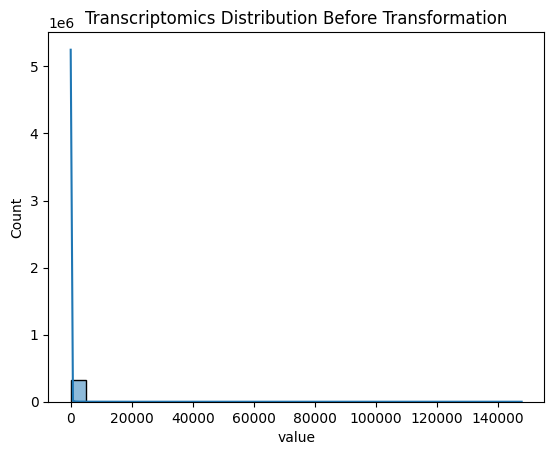

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_trans_kc["value"], kde=True, bins=30)
plt.title("Transcriptomics Distribution Before Transformation")
plt.show()


In [57]:
#remove values less than 0.3:

final_trans_kc = final_trans_kc[final_trans_kc["value"] >= 0]
final_trans_kc

#remove values greater than 4:
final_trans_kc = final_trans_kc[final_trans_kc["value"] <= 7.5]
final_trans_kc


,sample,value,feature,view,group
0,ID_5820,5.117969,Gnai3,transcriptomics_KC,group_KC_wt
1,ID_5821,0.434593,Gnai3,transcriptomics_KC,group_KC_wt
2,ID_5823,1.874695,Gnai3,transcriptomics_KC,group_KC_wt
3,ID_5824,2.837300,Gnai3,transcriptomics_KC,group_KC_wt
4,ID_5827,2.964545,Gnai3,transcriptomics_KC,group_KC_wt
...,...,...,...,...,...
339175,ID_5981,5.233865,AC144772.3,transcriptomics_KC,group_KC_wt
339177,ID_6024,1.355076,AC144772.3,transcriptomics_KC,group_KC_wt
339178,ID_6025,0.713446,AC144772.3,transcriptomics_KC,group_KC_wt
339179,ID_6026,3.836894,AC144772.3,transcriptomics_KC,group_KC_wt


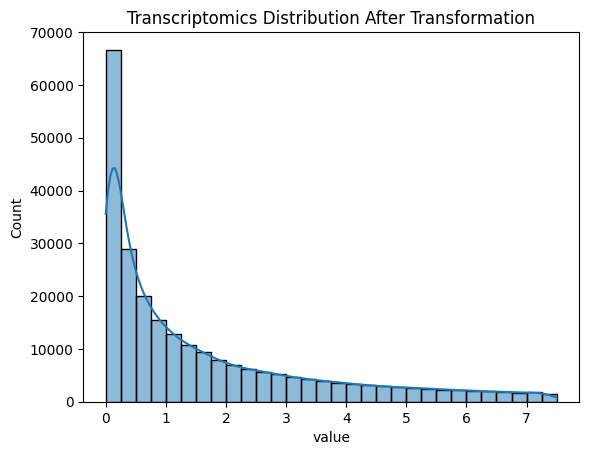

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_trans_kc["value"], kde=True, bins=30)
plt.title("Transcriptomics Distribution After Transformation")
plt.show()


In [59]:
final_trans_kc.describe()

,value
count,244825.000000
mean,1.623482
std,1.851467
min,0.000025
25%,0.214059
50%,0.851923
75%,2.444163
max,7.499553


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [60]:
merged_df = pd.concat([final_lipodomics, final_metabolomics, final_trans_kc], ignore_index=True)
merged_df

,sample,value,feature,view,group
0,HFD_HFD_CD_601,4.598996,DAG(36:1),Lipidomics,group_lipidomics_wt
1,CD_CD_CD_106,4.597894,PS(40:4),Lipidomics,group_lipidomics_wt
2,HFD_CD_HFD_703,4.597724,PS(40:7),Lipidomics,group_lipidomics_wt
3,CD_CD_CD_106,4.597488,TAG(58:8)_TAG,Lipidomics,group_lipidomics_wt
4,CD_CD_CD_105,4.596501,TAG(58:9)_TAG,Lipidomics,group_lipidomics_wt
...,...,...,...,...,...
269248,ID_5981,5.233865,AC144772.3,transcriptomics_KC,group_KC_wt
269249,ID_6024,1.355076,AC144772.3,transcriptomics_KC,group_KC_wt
269250,ID_6025,0.713446,AC144772.3,transcriptomics_KC,group_KC_wt
269251,ID_6026,3.836894,AC144772.3,transcriptomics_KC,group_KC_wt


In [ ]:
merged_df['value'].describe()

count    269253.000000
mean          1.589407
std           1.782893
min           0.000025
25%           0.254614
50%           0.923785
75%           2.286457
max           7.499553
Name: value, dtype: float64

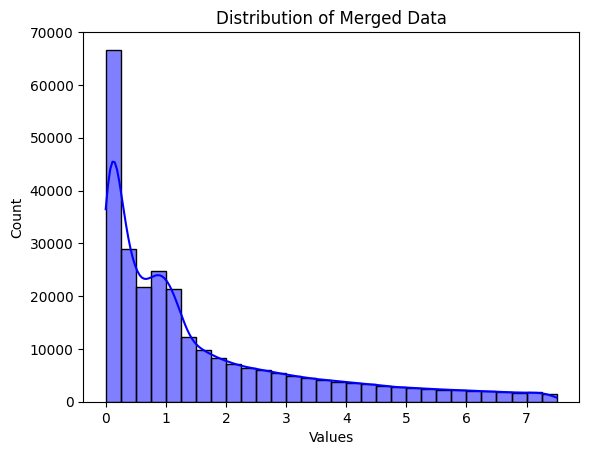

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(merged_df["value"], kde=True, bins=30, color='blue')

plt.title("Distribution of Merged Data")
plt.xlabel("Values")
plt.ylabel("Count")
plt.show()


In [63]:
merged_df.describe()

,value
count,269253.000000
mean,1.589407
std,1.782893
min,0.000025
25%,0.254614
50%,0.923785
75%,2.286457
max,7.499553


In [64]:
#set data options:

ent.set_data_options(scale_views = True)  

Scaling views to unit variance...



In [65]:
merged_df = merged_df.drop_duplicates(subset=['group', 'view', 'feature', 'sample'], keep='first')

merged_df

,sample,value,feature,view,group
0,HFD_HFD_CD_601,4.598996,DAG(36:1),Lipidomics,group_lipidomics_wt
1,CD_CD_CD_106,4.597894,PS(40:4),Lipidomics,group_lipidomics_wt
2,HFD_CD_HFD_703,4.597724,PS(40:7),Lipidomics,group_lipidomics_wt
3,CD_CD_CD_106,4.597488,TAG(58:8)_TAG,Lipidomics,group_lipidomics_wt
4,CD_CD_CD_105,4.596501,TAG(58:9)_TAG,Lipidomics,group_lipidomics_wt
...,...,...,...,...,...
269248,ID_5981,5.233865,AC144772.3,transcriptomics_KC,group_KC_wt
269249,ID_6024,1.355076,AC144772.3,transcriptomics_KC,group_KC_wt
269250,ID_6025,0.713446,AC144772.3,transcriptomics_KC,group_KC_wt
269251,ID_6026,3.836894,AC144772.3,transcriptomics_KC,group_KC_wt


In [66]:
# Set the data for MOFA+
ent.set_data_df(merged_df)



No data found for group='group_KC_wt' and view='Lipidomics'...
No data found for group='group_KC_wt' and view='metabolomics'...
Loaded group='group_KC_wt' view='transcriptomics_KC' with N=23 samples and D=13743 features...
Loaded group='group_lipidomics_wt' view='Lipidomics' with N=23 samples and D=342 features...
No data found for group='group_lipidomics_wt' and view='metabolomics'...
No data found for group='group_lipidomics_wt' and view='transcriptomics_KC'...
No data found for group='group_metabolomics_wt' and view='Lipidomics'...
Loaded group='group_metabolomics_wt' view='metabolomics' with N=42 samples and D=909 features...
No data found for group='group_metabolomics_wt' and view='transcriptomics_KC'...




In [67]:
#set model options
ent.set_model_options(
    factors= 10,
    spikeslab_weights=True,
    ard_weights=True
)


Model options:
- Automatic Relevance Determination prior on the factors: False
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights: True
Likelihoods:
- View 0 (Lipidomics): gaussian
- View 1 (metabolomics): gaussian
- View 2 (transcriptomics_KC): gaussian




In [68]:
#set training options
ent.set_train_options(
    convergence_mode="fast",
    dropR2=0.001,
    gpu_mode=False,
    seed=1
    )

In [69]:
# Convert object columns to strings

ent.build()
ent.run()

ent.save("s_factor_10_wt_mofa_model.hdf5")



######################################
## Training the model with seed 1 ##
######################################


ELBO before training: -2657242.66 

Iteration 1: time=0.42, ELBO=-476927.61, deltaELBO=2180315.050 (82.05178569%), Factors=9
Iteration 2: time=0.38, ELBO=-375031.31, deltaELBO=101896.301 (3.83466301%), Factors=9
Iteration 3: time=0.35, ELBO=-346338.68, deltaELBO=28692.627 (1.07978948%), Factors=9
Iteration 4: time=0.36, ELBO=-335981.83, deltaELBO=10356.844 (0.38975907%), Factors=9
Iteration 5: time=0.36, ELBO=-331038.73, deltaELBO=4943.105 (0.18602384%), Factors=9
Iteration 6: time=0.35, ELBO=-328344.79, deltaELBO=2693.938 (0.10138096%), Factors=9
Iteration 7: time=0.35, ELBO=-326688.11, deltaELBO=1656.686 (0.06234604%), Factors=9
Iteration 8: time=0.35, ELBO=-325589.41, deltaELBO=1098.697 (0.04134726%), Factors=9
Iteration 9: time=0.35, ELBO=-324782.53, deltaELBO=806.881 (0.03036536%), Factors=9
Iteration 10: time=0.35, ELBO=-324033.89, deltaELBO=748.634 (0.02817333%)